# Search stocks

In [6]:
import sys
!{sys.executable} -m pip install pandas_datareader yfinance matplotlib

You should consider upgrading via the '/usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [7]:
import pandas as pd
from pandas import DataFrame
import json
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
yf.pdr_override()


In [8]:
etfs = ["SPY", 
"GDX", 
"URTH", 
"ARKF", 
"ARKG", 
"ARKK", 
"ARKQ", 
"ARKW", 
"DBC", 
"GLD", 
"ICLN", 
"IVV", 
"QQQ", 
"TAN", 
"USO", 
"VOO", 
"VXX", 
"XLE", 
"XLK"]

ma_count = 21


data = pdr.get_data_yahoo(etfs, start=dt.datetime(2021,1,1), end=dt.date.today())['Close']
data.tail()


[*********************100%***********************]  19 of 19 completed


,ARKF,ARKG,ARKK,ARKQ,ARKW,DBC,GDX,GLD,ICLN,IVV,QQQ,SPY,TAN,URTH,USO,VOO,VXX,XLE,XLK
Date,,,,,,,,,,,,,,,,,,,
2021-07-21,52.820000,87.110001,122.660004,81.790001,146.190002,18.900000,33.619999,168.759995,22.860001,436.500000,361.559998,434.549988,86.410004,127.790001,48.270000,399.529999,29.940001,49.250000,151.880005
2021-07-22,53.169998,86.150002,121.709999,81.180000,146.270004,19.049999,33.410000,169.089996,22.870001,437.450012,363.950012,435.459991,85.629997,127.989998,49.169998,400.380005,30.469999,48.700001,153.000000
2021-07-23,53.480000,85.660004,122.430000,80.839996,148.190002,19.150000,33.150002,168.559998,22.559999,441.760010,368.200012,439.940002,83.459999,129.190002,49.470001,404.380005,30.330000,48.520000,154.520004
2021-07-26,52.259998,83.980003,121.599998,79.839996,148.779999,19.290001,33.500000,168.160004,22.379999,442.940002,368.489990,441.019989,82.269997,129.270004,49.669998,405.410004,29.850000,49.720001,154.440002
2021-07-27,50.750000,82.639999,118.620003,78.389999,145.729996,19.180000,33.680000,168.440002,22.219999,440.920013,364.429993,439.010010,80.519997,128.820007,49.470001,403.609985,30.860001,49.259998,152.979996


In [9]:
ma = data.rolling(window=ma_count).mean()
ma_pers = data.div(ma).mul(100).sub(100)
#ma_pers.iloc[[-1]]
ma_pers_r=ma_pers.iloc[::-1]
d = {}
df_prep = []
for col_name in ma_pers_r.columns:
    d[col_name]=0
    ma_last = None
    for index, row in ma_pers_r.iterrows():
        if row[col_name] > 0:
            d[col_name] += 1
            if ma_last == None:
                ma_last=row[col_name]
        else:
            if d[col_name] != 0:
               df_prep.append([col_name, d[col_name], ma_last, ma_count, "daily"]) 
            break
df = DataFrame(df_prep,columns=['name','count', 'ma_diff', 'ma_size', 'ma_type']).sort_values(by=['ma_diff', 'count'], ascending=False)
print(df['count'][df['count'] >= 5].size)
lead_comps_df = df[df['count'] >= 5]
lead_comps = lead_comps_df['name'].values.tolist()
lead_comps_df

6


,name,count,ma_diff,ma_size,ma_type
9,XLK,6,1.452027,21,daily
2,IVV,6,1.287188,21,daily
4,SPY,6,1.285294,21,daily
7,VOO,6,1.273471,21,daily
3,QQQ,6,1.185314,21,daily
5,URTH,5,0.973829,21,daily


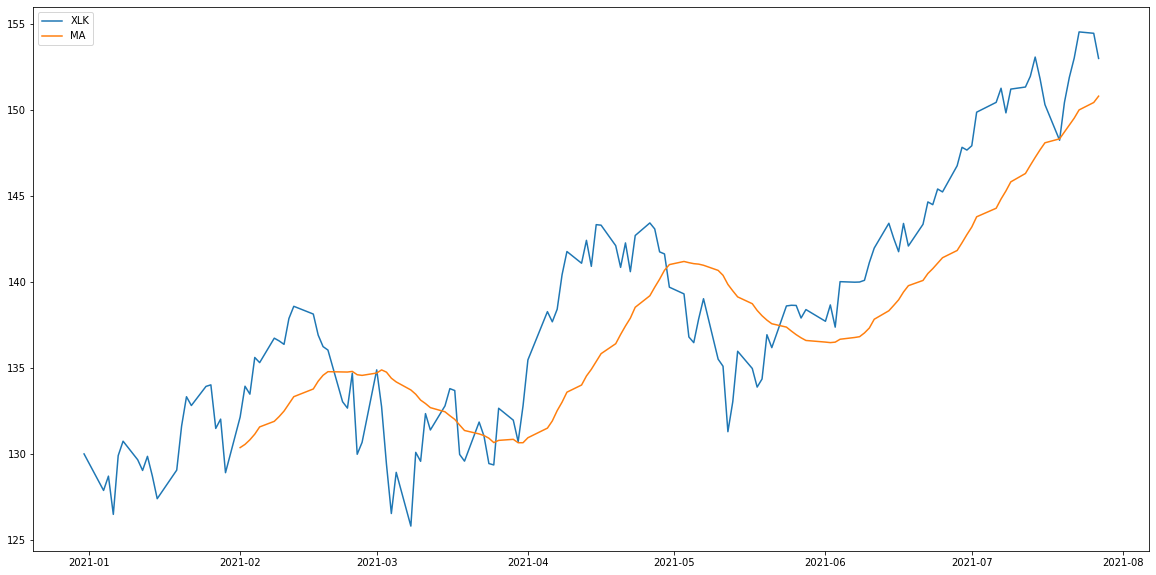

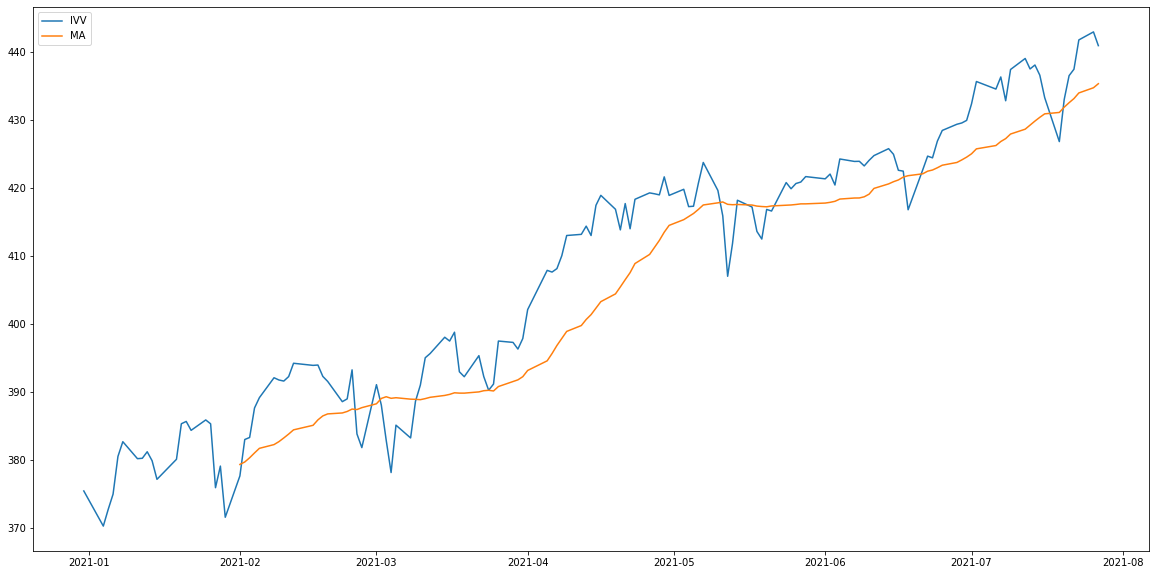

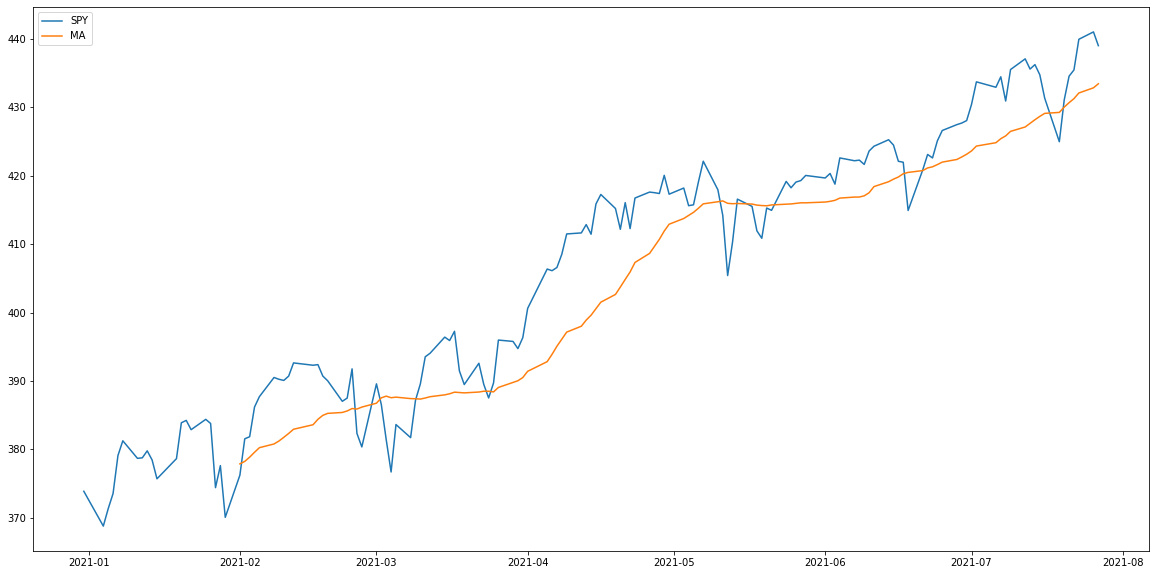

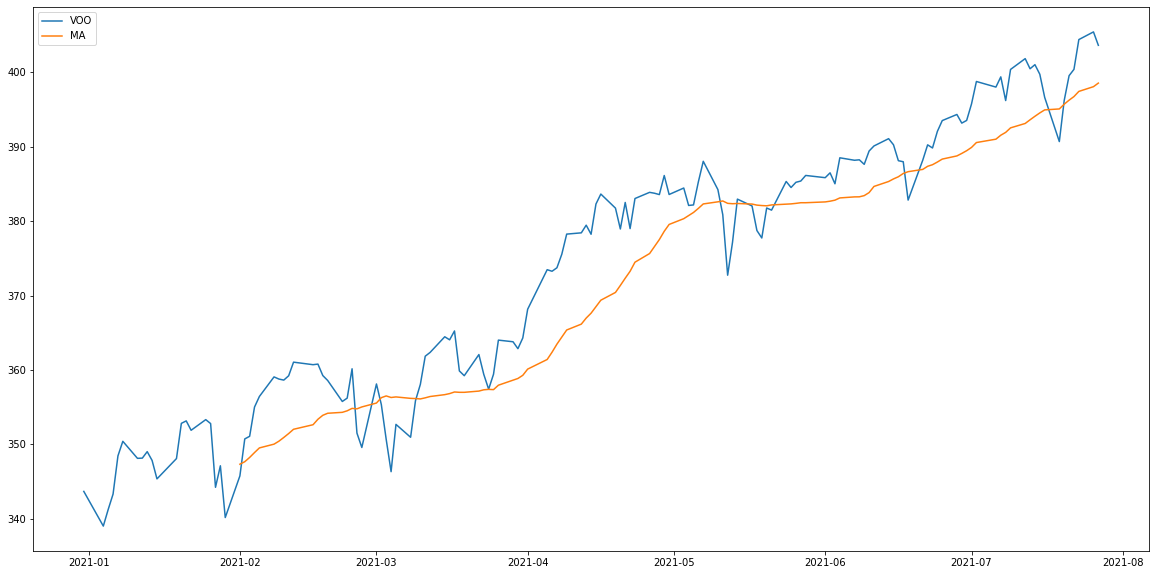

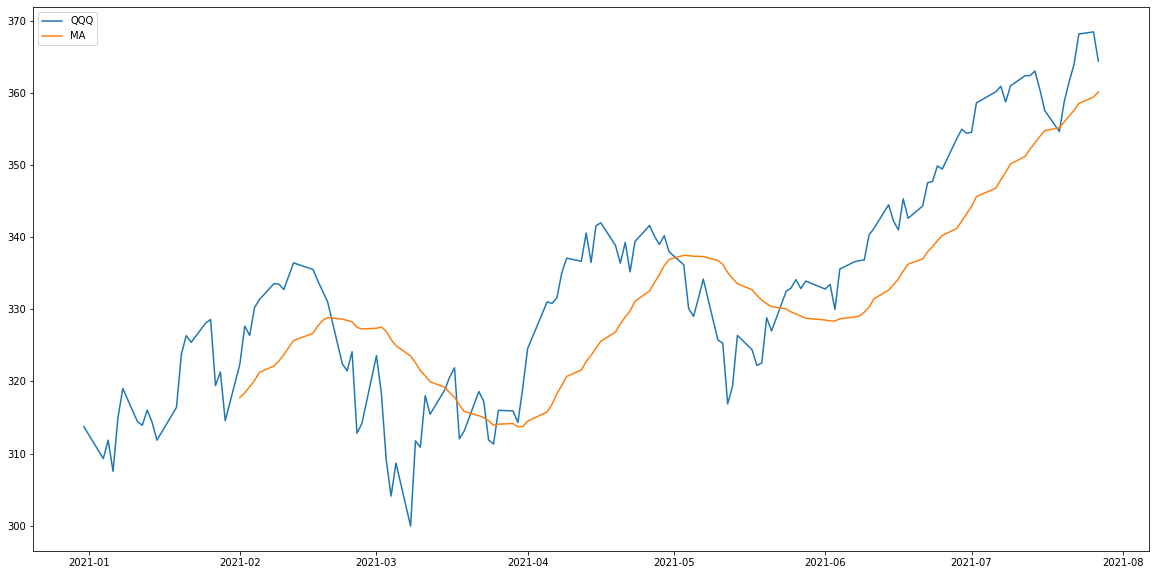

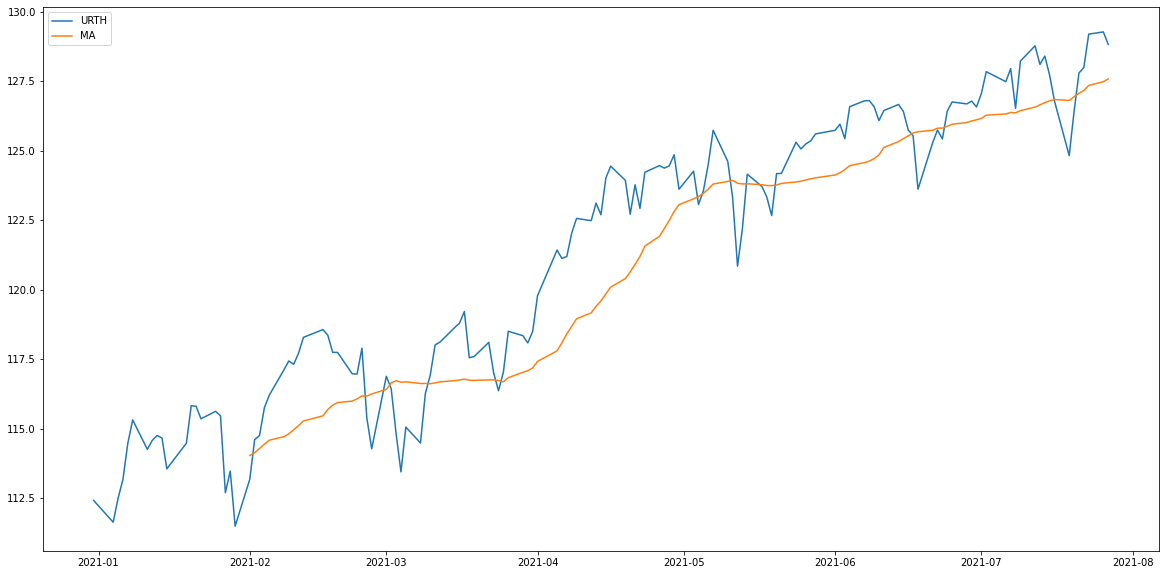

In [10]:
for quote in lead_comps:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(data[quote], label=quote);
    plt.plot(ma[quote], label = 'MA');
    plt.legend(loc=2);